# Data Ingestion and Cleaning

In this notebook, we will create a pipeline to:
* Ingest the data 
* Format the data into useable types for ML
* Clean the data - deal with messy/missing data
* Normalize/Standardize the data as needed - get the data into a more efficient set of values

First, we will look at each of the pieces of the pipeline individually, followed by a pipeline to make this easier in the future.

## Part 1.  Data Ingestion

There are many formats we could use to ingest data.  I don't have an API key for my brokerage account, so I have to resort to downloading the data in a fairly messy, manual manner.  The easiest route results in a .csv file, so we will use that for the time being.  

Fortunately, it is not a huge dataset, so does not need to utilize any technologies for big data, such as Spark, or a database backend.

In the future, I would like to create a backend chron job to pull data using an API key, but Chase is not responding to my request for one. 

In [250]:
# Set up Imports
import os
import pandas as pd

# Set up some globals or environment paths and such that we may need
DATA_FILE = 'AAPL_Advanced.csv'
DATA_PATH = os.path.join("..","data", "raw", DATA_FILE)


In [251]:
stockdf = pd.read_csv(DATA_PATH, index_col=0) # index is the date

# Inspect the data for inconsistencies/errors

In [252]:
stockdf.head()

,close,ExactBestMajorReversals,DayAfterMajorReversal,4_days_ahead_TARGET,5pct_20day_TARGET,5pct_10day_TARGET,2_5pct_5day_TARGET,vix,candleHeight,6_day_SMA,...,daysToEarnings,daysToDividend,TenYearFuturesContract,TwoYearFuturesContract,2yr_Yield,10yr_Yield,2yr_pct_chg,10yr_pct_chg,10yr_2yr_diff,10_2_diff_pct_chg
date,,,,,,,,,,,,,,,,,,,,,
7/16/2014,23.6950,HOLD,HOLD,HOLD,HOLD,HOLD,BUY,NaN,NaN,NaN,...,-4,-16.0,124.9688,109.6875,0.488,2.530,0.0000,0.0000,2.042,0.0000
7/17/2014,23.2725,HOLD,HOLD,HOLD,HOLD,HOLD,BUY,14.54,0.4850,NaN,...,-3,-15.0,125.6250,109.7734,0.448,2.442,-0.0820,-0.0348,1.994,-0.0235
7/18/2014,23.6075,HOLD,HOLD,HOLD,HOLD,HOLD,BUY,12.06,0.2025,NaN,...,-2,-14.0,125.2656,109.7188,0.484,2.482,0.0804,0.0164,1.998,0.0020
7/21/2014,23.4847,HOLD,HOLD,HOLD,BUY,HOLD,BUY,12.81,0.2628,NaN,...,-1,-13.0,125.3125,109.6953,0.492,2.469,0.0165,-0.0052,1.977,-0.0105
7/22/2014,23.6800,HOLD,HOLD,HOLD,BUY,HOLD,BUY,12.24,0.0100,NaN,...,0,-12.0,125.4219,109.7266,0.476,2.466,-0.0325,-0.0012,1.990,0.0066


In [253]:
stockdf.info()


<class 'pandas.core.frame.DataFrame'>
Index: 2516 entries, 7/16/2014 to 7/15/2024
Data columns (total 51 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   close                    2516 non-null   float64
 1   ExactBestMajorReversals  2515 non-null   object 
 2   DayAfterMajorReversal    2516 non-null   object 
 3   4_days_ahead_TARGET      2512 non-null   object 
 4   5pct_20day_TARGET        2496 non-null   object 
 5   5pct_10day_TARGET        2506 non-null   object 
 6   2_5pct_5day_TARGET       2511 non-null   object 
 7   vix                      2513 non-null   float64
 8   candleHeight             2515 non-null   float64
 9   6_day_SMA                2511 non-null   float64
 10  pct_Diff_from_6_day_SMA  2511 non-null   float64
 11  Slope_6_Day_SMA          2509 non-null   float64
 12  4_day_SMA                2513 non-null   float64
 13  Slope_4_day_SMA          2512 non-null   float64
 14  newHighs1Y      

Lots of objects in there.  These are the various TARGET labels.  Let's convert them to categories.

In [254]:
stockdf.ExactBestMajorReversals = stockdf.ExactBestMajorReversals.astype("category")
stockdf.DayAfterMajorReversal = stockdf.DayAfterMajorReversal.astype("category")
stockdf['4_days_ahead_TARGET'] = stockdf['4_days_ahead_TARGET'].astype("category")
stockdf["5pct_10day_TARGET"] = stockdf["5pct_10day_TARGET"].astype("category")
stockdf["5pct_20day_TARGET"] = stockdf["5pct_20day_TARGET"].astype("category")
stockdf["2_5pct_5day_TARGET"] = stockdf["2_5pct_5day_TARGET"].astype("category")

In [255]:
stockdf.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2516 entries, 7/16/2014 to 7/15/2024
Data columns (total 51 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   close                    2516 non-null   float64 
 1   ExactBestMajorReversals  2515 non-null   category
 2   DayAfterMajorReversal    2516 non-null   category
 3   4_days_ahead_TARGET      2512 non-null   category
 4   5pct_20day_TARGET        2496 non-null   category
 5   5pct_10day_TARGET        2506 non-null   category
 6   2_5pct_5day_TARGET       2511 non-null   category
 7   vix                      2513 non-null   float64 
 8   candleHeight             2515 non-null   float64 
 9   6_day_SMA                2511 non-null   float64 
 10  pct_Diff_from_6_day_SMA  2511 non-null   float64 
 11  Slope_6_Day_SMA          2509 non-null   float64 
 12  4_day_SMA                2513 non-null   float64 
 13  Slope_4_day_SMA          2512 non-null   float64 
 14  

We still have a couple object types in there for advanced/declined volumeComp
The csv was created in Excel, so probably got an error on them, so resolves "N/A or #" as string, while everything else is a number.  Or, they may be numbers with a ','...

In [256]:
stockdf.isna().sum()

close                        0
ExactBestMajorReversals      1
DayAfterMajorReversal        0
4_days_ahead_TARGET          4
5pct_20day_TARGET           20
5pct_10day_TARGET           10
2_5pct_5day_TARGET           5
vix                          3
candleHeight                 1
6_day_SMA                    5
pct_Diff_from_6_day_SMA      5
Slope_6_Day_SMA              7
4_day_SMA                    3
Slope_4_day_SMA              4
newHighs1Y                   0
newLows1Y                    0
CHLI_1Y                      0
newHighs1M                   0
newLows1M                    0
CHLI_1M                      0
newHighs2W                   1
newLows2W                    0
CHLI_2W                      0
newHighs1W                   0
newLows1W                    0
CHLI_1W                      0
advancedIssues               0
declinedIssues               0
ADV_Issues                   0
advancedVolume               0
declinedVolume               0
ADV_Vol                      0
advanced

Looks like they must be strings.  Lets convert them to numeric

In [257]:

stockdf.advancedVolumeComp = stockdf.advancedVolumeComp.str.replace(",","")
stockdf.declinedVolumeComp = stockdf.declinedVolumeComp.str.replace(",","")
stockdf.newLows1W = stockdf.newLows1W.str.replace(",","")

stockdf.advancedVolumeComp = stockdf.advancedVolumeComp.astype(int)
stockdf.declinedVolumeComp = stockdf.declinedVolumeComp.astype(int)
stockdf.newLows1W = stockdf.newLows1W.astype(int)

# stockdf.advancedVolumeComp = pd.to_numeric(stockdf.advancedVolumeComp, downcast="integer", errors='coerce')
# stockdf.declinedVolumeComp = pd.to_numeric(stockdf.declinedVolumeComp, downcast="integer",errors='coerce')
# stockdf.newLows1W = pd.to_numeric(stockdf.newLows1W, downcast="integer",errors='coerce')

In [258]:
stockdf.isna().sum()

close                        0
ExactBestMajorReversals      1
DayAfterMajorReversal        0
4_days_ahead_TARGET          4
5pct_20day_TARGET           20
5pct_10day_TARGET           10
2_5pct_5day_TARGET           5
vix                          3
candleHeight                 1
6_day_SMA                    5
pct_Diff_from_6_day_SMA      5
Slope_6_Day_SMA              7
4_day_SMA                    3
Slope_4_day_SMA              4
newHighs1Y                   0
newLows1Y                    0
CHLI_1Y                      0
newHighs1M                   0
newLows1M                    0
CHLI_1M                      0
newHighs2W                   1
newLows2W                    0
CHLI_2W                      0
newHighs1W                   0
newLows1W                    0
CHLI_1W                      0
advancedIssues               0
declinedIssues               0
ADV_Issues                   0
advancedVolume               0
declinedVolume               0
ADV_Vol                      0
advanced

Great, now looking at the number of NaNs, it looks like we have a few in various columns.  we should have a total of 2516 rows.
Sometimes we just need to look at the data to determine whether we can interpolate or simply eliminate the rows.

Since this is time-series data, we have to make sure we aren't skewing the results by elimnating rows where we shouldn't

* The targets (categorical types) are missing data at the end, so we may want to clean differently depending upon which target we are using, so we don't eliminate good useful data for all of them.  
* vix - we can interpolate the value  
* candleHeight - eliminate the row, it is just the last row missing
* SMAs - eliminate the rows, it should just be the first rows
* PutCallRatios - seriously consider not using this, or eliminate the rows
* Bond yields - there are some N/As in there that could be interpolated (the chg and diff can be regenerated, so eliminate them)
* Days to Dividend - missing the last 43 days or so - we don't know the number of days between, so cannot fill this in, so either elimnate as a feature or eliminate the last 43 rows.




Interpolate the vix

In [259]:
stockdf.vix = stockdf.vix.interpolate()
stockdf.vix.isna().sum()

1

In [260]:
bad_vals = stockdf['vix'].isna()
typos = stockdf.vix[bad_vals]
typos

date
7/16/2014   NaN
Name: vix, dtype: float64

This is the first entry, so can't interpolate it.  It will be removed when we remove the SMA stuff.

Now lets see if we need to fix any of the bond data

In [261]:
bad_vals = stockdf['2yr_Yield'].isna()
typos = stockdf['2yr_Yield'][bad_vals]
typos

date
10/12/2020   NaN
11/11/2022   NaN
Name: 2yr_Yield, dtype: float64

In [262]:
stockdf['2yr_Yield'].interpolate(inplace=True)
stockdf['2yr_Yield'].isna().sum()

0

In [263]:
bad_vals = stockdf['10yr_Yield'].isna()
typos = stockdf['10yr_Yield'][bad_vals]
typos

date
11/11/2022   NaN
Name: 10yr_Yield, dtype: float64

In [264]:
stockdf['10yr_Yield'].interpolate(inplace=True)
stockdf['10yr_Yield'].isna().sum()

0

Regenerate the pct_chg and diff columns

In [265]:
stockdf['2yr_pct_chg'] = stockdf['2yr_Yield'].pct_change()
stockdf['10yr_pct_chg'] = stockdf['10yr_Yield'].pct_change()
stockdf['10yr_2yr_diff'] = stockdf['10yr_Yield'] - stockdf['2yr_Yield']
stockdf['10_2_diff_pct_chg']= stockdf['10yr_2yr_diff'].pct_change()
stockdf.isna().sum()

close                        0
ExactBestMajorReversals      1
DayAfterMajorReversal        0
4_days_ahead_TARGET          4
5pct_20day_TARGET           20
5pct_10day_TARGET           10
2_5pct_5day_TARGET           5
vix                          1
candleHeight                 1
6_day_SMA                    5
pct_Diff_from_6_day_SMA      5
Slope_6_Day_SMA              7
4_day_SMA                    3
Slope_4_day_SMA              4
newHighs1Y                   0
newLows1Y                    0
CHLI_1Y                      0
newHighs1M                   0
newLows1M                    0
CHLI_1M                      0
newHighs2W                   1
newLows2W                    0
CHLI_2W                      0
newHighs1W                   0
newLows1W                    0
CHLI_1W                      0
advancedIssues               0
declinedIssues               0
ADV_Issues                   0
advancedVolume               0
declinedVolume               0
ADV_Vol                      0
advanced

Drop the PutCallRatio column.  Eats too much of our data

In [266]:
stockdf.drop(columns=['PutCallRatio', 'daysToDividend'], inplace=True)
stockdf.isna().sum()

close                        0
ExactBestMajorReversals      1
DayAfterMajorReversal        0
4_days_ahead_TARGET          4
5pct_20day_TARGET           20
5pct_10day_TARGET           10
2_5pct_5day_TARGET           5
vix                          1
candleHeight                 1
6_day_SMA                    5
pct_Diff_from_6_day_SMA      5
Slope_6_Day_SMA              7
4_day_SMA                    3
Slope_4_day_SMA              4
newHighs1Y                   0
newLows1Y                    0
CHLI_1Y                      0
newHighs1M                   0
newLows1M                    0
CHLI_1M                      0
newHighs2W                   1
newLows2W                    0
CHLI_2W                      0
newHighs1W                   0
newLows1W                    0
CHLI_1W                      0
advancedIssues               0
declinedIssues               0
ADV_Issues                   0
advancedVolume               0
declinedVolume               0
ADV_Vol                      0
advanced

In [267]:
bad_vals = stockdf['2yr_pct_chg'].isna()
typos = stockdf['2yr_pct_chg'][bad_vals]
typos

date
7/16/2014   NaN
Name: 2yr_pct_chg, dtype: float64

Interpolate newHighs2W, candleHeight

In [268]:
bad_vals = stockdf['candleHeight'].isna()
typos = stockdf['candleHeight'][bad_vals]
typos

date
7/16/2014   NaN
Name: candleHeight, dtype: float64

candleheight is just the first value, we'll drop that row anyway

In [269]:
stockdf.newHighs2W = stockdf.newHighs2W.interpolate()
stockdf.newHighs2W.isna().sum()

0

# Add new derived features

Before we eliminate any more data, I think we want to see how the 10 and 20 day SMA slopes affect anything.  Let's add those, since they were not already in the dataset:

In [270]:
for offset in [10, 20]:
    colname = "{}_day_SMA".format(offset)
    stockdf[colname] = stockdf['close'].rolling(offset).mean()



In [271]:
#stockdf['10_day_SMA'].head(12)
stockdf['20_day_SMA'].head(22)

date
7/16/2014          NaN
7/17/2014          NaN
7/18/2014          NaN
7/21/2014          NaN
7/22/2014          NaN
7/23/2014          NaN
7/24/2014          NaN
7/25/2014          NaN
7/28/2014          NaN
7/29/2014          NaN
7/30/2014          NaN
7/31/2014          NaN
8/1/2014           NaN
8/4/2014           NaN
8/5/2014           NaN
8/6/2014           NaN
8/7/2014           NaN
8/8/2014           NaN
8/11/2014          NaN
8/12/2014    23.962250
8/13/2014    23.993000
8/14/2014    24.048125
Name: 20_day_SMA, dtype: float64

In [272]:
# add the slopes (diff of SMA)
stockdf['10_day_SMA_slope'] = stockdf['10_day_SMA'].pct_change()
stockdf['20_day_SMA_slope'] = stockdf['20_day_SMA'].pct_change()

In [275]:
stockdf['price_chg'] = stockdf['close'].pct_change()
stockdf['vix_chg'] = stockdf['vix'].diff()
stockdf['Slope_4_day_SMA'] = stockdf['4_day_SMA'].pct_change()
stockdf['Slope_6_day_SMA'] = stockdf['6_day_SMA '].pct_change() # there is a space in this name

# Stationar-ize the data

Some of these are not stationary... like price, SMA, bond yield, etc.  We've already got stationarized data derived from most of the non-stationary data.  But we don't have it for the stock price yet!  

In [293]:
# Give the plots a nice look
from jupyterthemes import jtplot
jtplot.style(theme='oceans16', context='notebook', ticks=True, grid=False) 

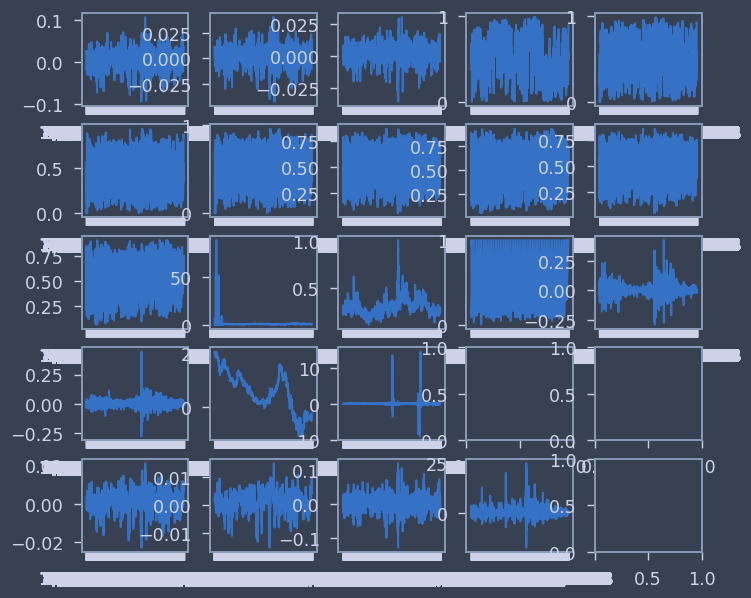

In [294]:
# import matplotlib.pyplot as plt

# fig, ax = plt.subplots(5,5)
# ax[0,0].plot(stockdf['pct_Diff_from_6_day_SMA'])
# ax[0,1].plot(stockdf['Slope_4_day_SMA'])
# ax[0,2].plot(stockdf['Slope_6_day_SMA'])
# ax[0,3].plot(stockdf['CHLI_1Y'])
# ax[0,4].plot(stockdf['CHLI_1M'])
# ax[1,0].plot(stockdf['CHLI_2W'])
# ax[1,1].plot(stockdf['CHLI_1W'])
# ax[1,2].plot(stockdf['ADV_Issues'])
# ax[1,3].plot(stockdf['ADV_Vol'])
# ax[1,4].plot(stockdf['ADV_Issues_Comp'])
# ax[2,0].plot(stockdf['ADV_Vol_Comp'])
# ax[2,1].plot(stockdf['PutCallRatio100'])
# ax[2,2].plot(stockdf['ImpVol'])
# ax[2,3].plot(stockdf['daysToEarnings'])
# ax[2,4].plot(stockdf['2yr_pct_chg'])
# ax[3,0].plot(stockdf['10yr_pct_chg'])
# ax[3,1].plot(stockdf['10yr_2yr_diff'])
# ax[3,2].plot(stockdf['10_2_diff_pct_chg'])
# ax[4,0].plot(stockdf['10_day_SMA_slope'])
# ax[4,1].plot(stockdf['20_day_SMA_slope'])
# ax[4,2].plot(stockdf['price_chg'])
# ax[4,3].plot(stockdf['vix_chg'])
# plt.show()

<Axes: xlabel='date'>

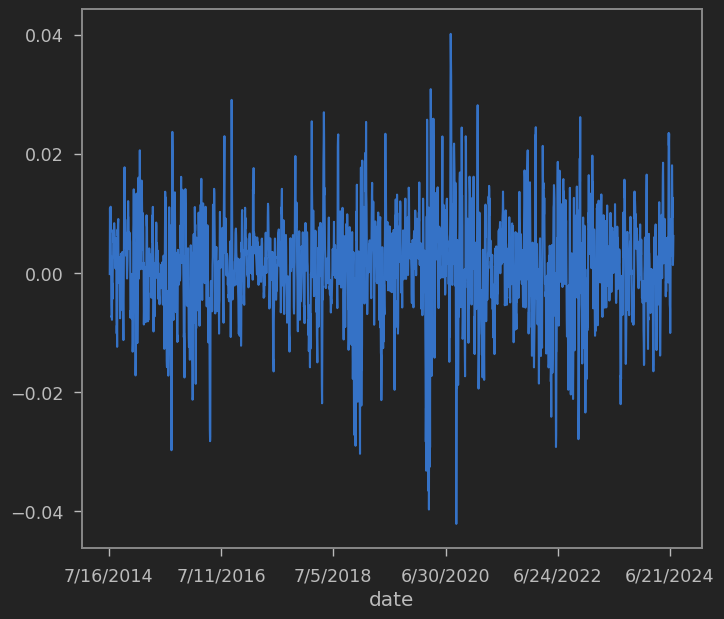

In [298]:
jtplot.style(theme='monokai', context='notebook', ticks=True, grid=False) 
stockdf['Slope_4_day_SMA'].plot()

<Axes: xlabel='date'>

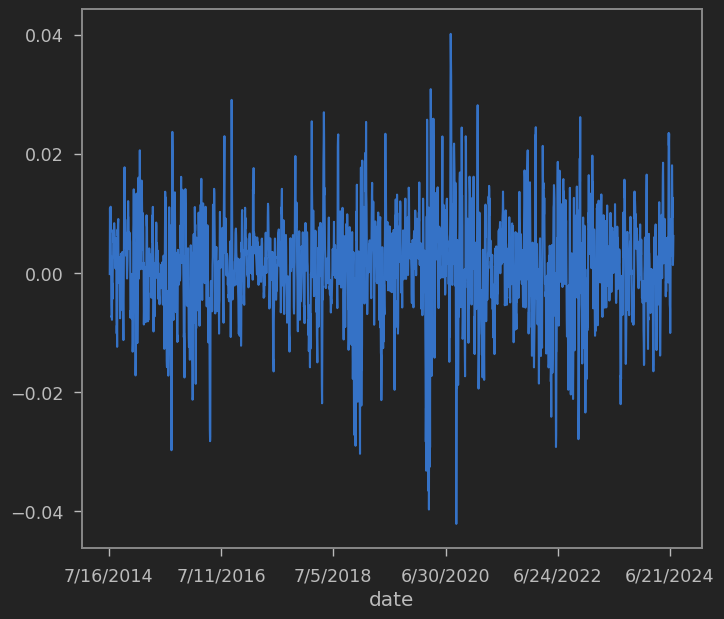

In [299]:
stockdf['Slope_4_day_SMA'].plot()

<Axes: xlabel='date'>

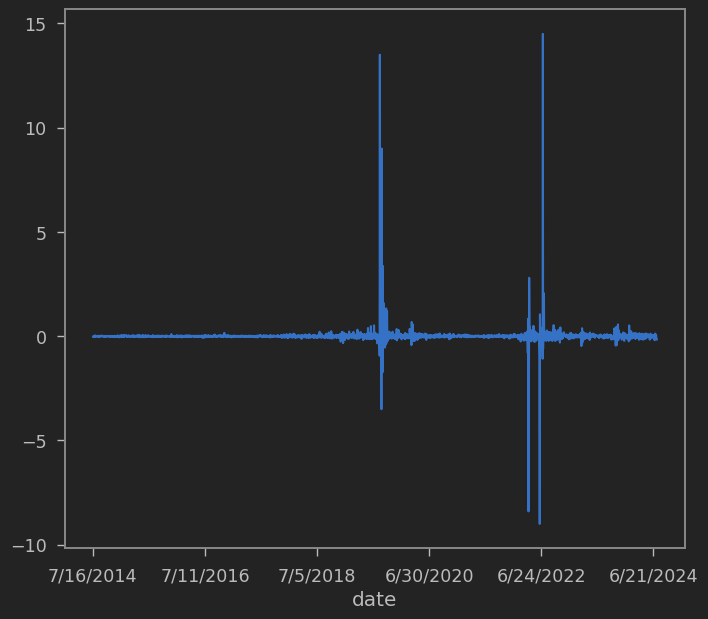

In [287]:
stockdf['10_2_diff_pct_chg'].plot()

<Axes: xlabel='date'>

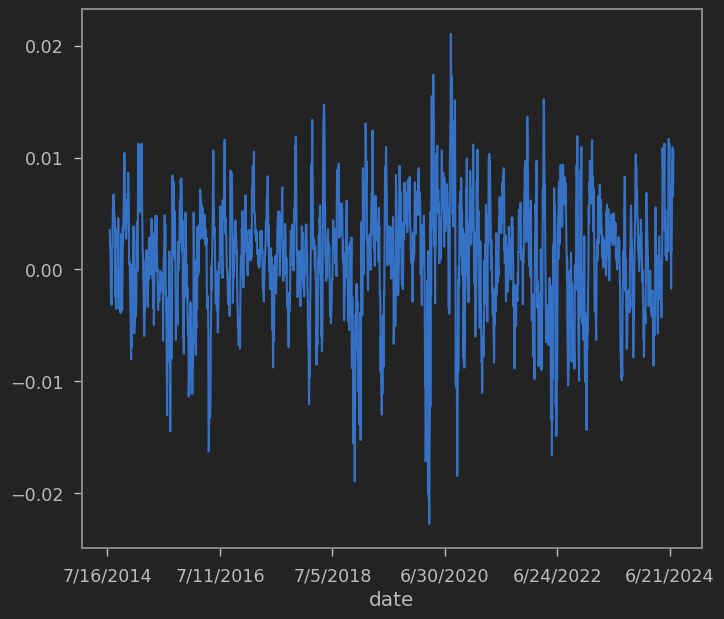

In [288]:
stockdf['10_day_SMA_slope'].plot()

<Axes: xlabel='date'>

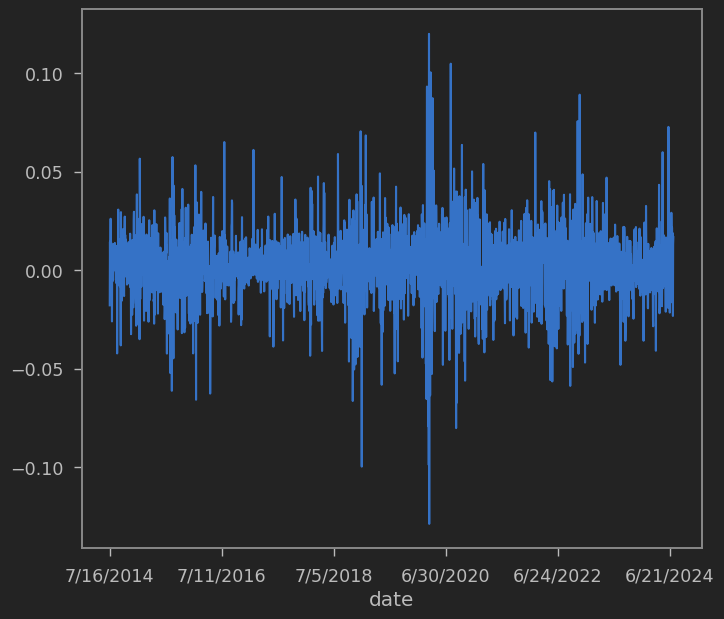

In [289]:
stockdf['price_chg'].plot()

<Axes: xlabel='date'>

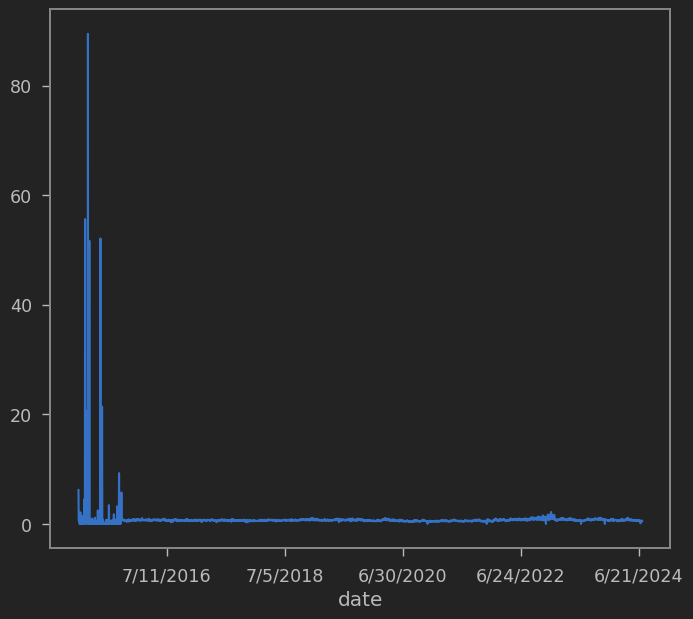

In [290]:
stockdf['PutCallRatio100'].plot()

<Axes: xlabel='date'>

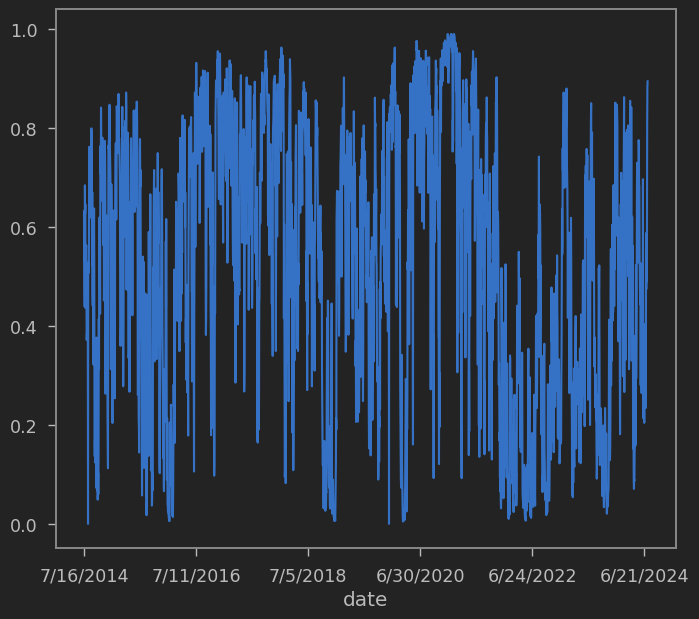

In [291]:
stockdf['CHLI_1Y'].plot()

This does not seem useful, get rid of outliers if we continue to use it., but that seems like a lot

<Axes: xlabel='date'>

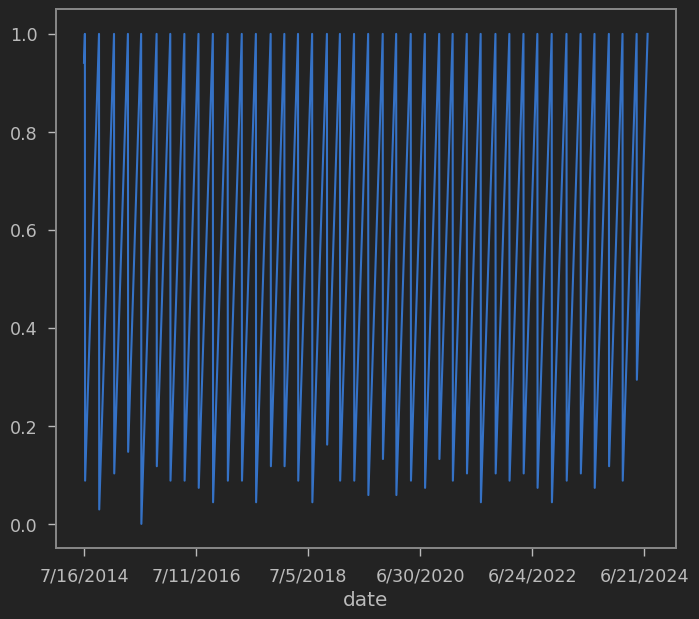

In [292]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
earningsScaler = MinMaxScaler()

stockdf['daysToEarnings'] = earningsScaler.fit_transform(stockdf[['daysToEarnings']])
stockdf.daysToEarnings.plot()

Okay, I believe everything left is either at the beginning or end, so lets clip our data to just the good stuff in the middle.

Since we want to keep the PutCallRatio100, there is no point in customizing the drops based on the target, so now lets just drop all of the NAs

In [138]:
stockdf.dropna(inplace=True)

In [139]:
stockdf.isna().sum()

close                      0
ExactBestMajorReversals    0
DayAfterMajorReversal      0
4_days_ahead_TARGET        0
5pct_20day_TARGET          0
5pct_10day_TARGET          0
2_5pct_5day_TARGET         0
vix                        0
candleHeight               0
6_day_SMA                  0
pct_Diff_from_6_day_SMA    0
Slope_6_Day_SMA            0
4_day_SMA                  0
Slope_4_day_SMA            0
newHighs1Y                 0
newLows1Y                  0
CHLI_1Y                    0
newHighs1M                 0
newLows1M                  0
CHLI_1M                    0
newHighs2W                 0
newLows2W                  0
CHLI_2W                    0
newHighs1W                 0
newLows1W                  0
CHLI_1W                    0
advancedIssues             0
declinedIssues             0
ADV_Issues                 0
advancedVolume             0
declinedVolume             0
ADV_Vol                    0
advancedIssuesComp         0
declinedIssuesComp         0
ADV_Issues_Com

# Eliminate uneccesary columns

So, we don't need all of these columns, some are non-stationary, which causes issues for the ML algorithms.

Let's get a simpler dataset.

In [142]:
columns_to_use = ['pct_Diff_from_6_day_SMA', 'Slope_6_day_SMA', 'Slope_4_day_SMA','CHLI_1Y', 'CHLI_1M', 'CHLI_2W',
       'CHLI_1W', 'ADV_Issues','ADV_Vol','ADV_Issues_Comp', 'ADV_Vol_Comp', 'ImpVol', 'daysToEarnings',
       '2yr_pct_chg', '10yr_pct_chg', '10yr_2yr_diff',
       '10_2_diff_pct_chg', '10_day_SMA', '20_day_SMA', '10_day_SMA_slope',
       '20_day_SMA_slope', 'price_chg', 'vix_chg']

In [281]:
xbase_df = stockdf[columns_to_use]
ybase_df = stockdf['DayAfterMajorReversal']

In [282]:
ybase_df

date
7/16/2014    HOLD
7/17/2014    HOLD
7/18/2014    HOLD
7/21/2014    HOLD
7/22/2014    HOLD
             ... 
7/9/2024      BUY
7/10/2024     BUY
7/11/2024     BUY
7/12/2024     BUY
7/15/2024     BUY
Name: DayAfterMajorReversal, Length: 2516, dtype: category
Categories (3, object): ['BUY', 'HOLD', 'SELL']

# Create an import utility script

utils.py  import_stock_csv() now contains the above code for later use in this project.


If this data were a little cleaner from the source, we could probably use an sklearn Pipeline to simply scale and then add our ML model... 

TODO: maybe we could create an sklearn transformer type (not the AI model) from our script and use it in the pipeline...

In [1]:
# test it
import stockutils 
features_df, target_df,_= stockutils.import_stock_csv("AAPL_Advanced.csv")

In [3]:
features_df.isna().sum()

pct_Diff_from_6_day_SMA    0
Slope_6_day_SMA            0
Slope_4_day_SMA            0
CHLI_1Y                    0
CHLI_1M                    0
CHLI_2W                    0
CHLI_1W                    0
ADV_Issues                 0
ADV_Vol                    0
ADV_Issues_Comp            0
ADV_Vol_Comp               0
ImpVol                     0
daysToEarnings             0
2yr_pct_chg                0
10yr_pct_chg               0
10yr_2yr_diff              0
10_2_diff_pct_chg          0
10_day_SMA                 0
20_day_SMA                 0
10_day_SMA_slope           0
20_day_SMA_slope           0
price_chg                  0
vix_chg                    0
dtype: int64

In [4]:
target_df.head()

date
1/13/2015    HOLD
1/14/2015    HOLD
1/15/2015    HOLD
1/16/2015    HOLD
1/20/2015     BUY
Name: DayAfterMajorReversal, dtype: category
Categories (3, object): ['BUY', 'HOLD', 'SELL']

# Data Normalization/Standardization

In [ ]:
from sklearn.preprocessing import StandardScaler